# Grid Search Drawbacks


As an example, consider doing grid search when we have two parameters
$x \in [-a, a]$, and $y \in [-b, b]$

Choose a grid with spacing $d$ between points.  This means that we have $M = 2a/d$ points in $x$ and $N = 2b/d$ points in y.  $M \times N = (2a)(2b)/d^2$

In general, grid search as a complexity $O(c^d)$ for a $d$-dimensional function space

This is called the "curse of dimensionality"

# Logistic Perceptron

We're going to look at an important family of functions known as the "logistic perceptron."  Let's first consider the 1D case



## 1D Logistic Perceptron


### $f_{a, b}(x) = \sigma(ax + b)$

Logistic function

## $\sigma(u) = \frac{1}{1 + e^{-u}}$



(-0.1, 1.1)

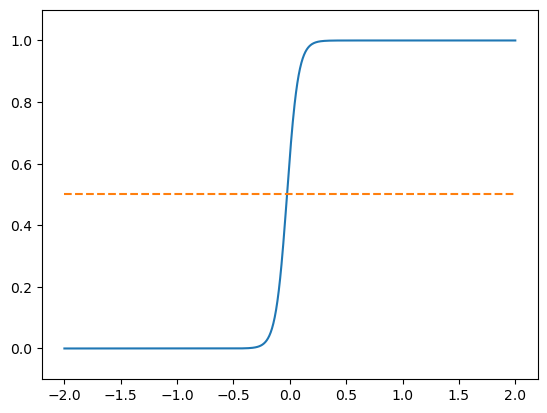

In [1]:
import numpy as np
import matplotlib.pyplot as plt

logistic = lambda u: 1/(1 + np.exp(-u))

a = 20
b = 0.5

x = np.linspace(-2, 2, 1000)
y = logistic(a*x + b)
plt.plot(x, y)
plt.plot(x, 0.5*np.ones(x.size), linestyle='--')
plt.ylim([-0.1, 1.1])


In [2]:
import numpy as np
import matplotlib.pyplot as plt


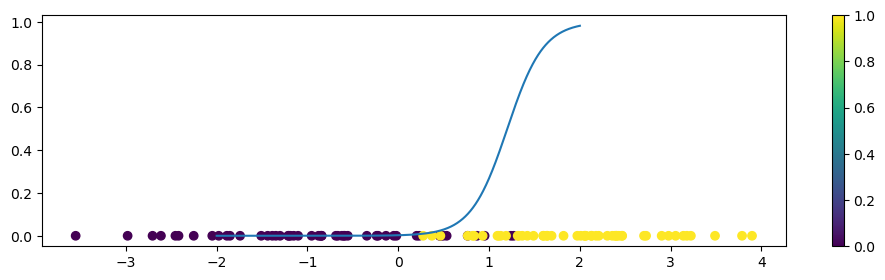

In [3]:

# Create a synthetic dataset of a bunch of numbers labeled 0
# interspersed with another bunch of numbers labeled 1

N = 50
np.random.seed(0)
# X is data, Y is labels 
X = np.random.randn(N) - 1
Y = np.zeros(N)
X = np.concatenate((X, np.random.randn(N)+2))
Y = np.concatenate((Y, np.ones(N)))



plt.figure(figsize=(12, 3))
plt.scatter(X, np.zeros(X.size), c=Y)
plt.colorbar();

x = np.linspace(-2, 2, 1000)

a = 5
b = -6
y = logistic(a*x + b)
plt.plot(x, y)

## 2D Logistic Perceptron

### $f(x, y) = ax + by + c$

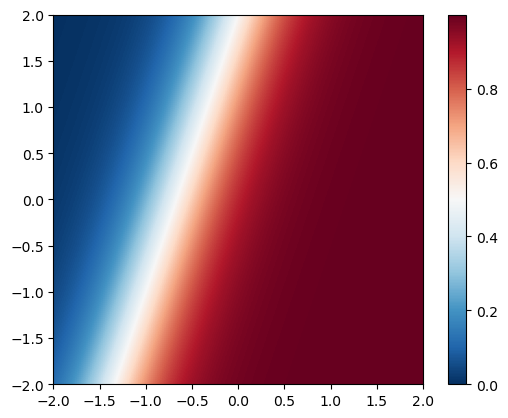

In [4]:
resol = 200
mx = 2
xx = np.linspace(-mx, mx, resol)
yy = np.linspace(-mx, mx, resol)
xx, yy = np.meshgrid(xx, yy)

a = 3
b = 1
c = 2
z = a*xx + b*yy + c
z = logistic(z)
rg = np.max(np.abs(z))
plt.imshow(z, cmap='RdBu_r', extent=(-mx, mx, -mx, mx), vmin=0, vmax=rg)
plt.colorbar()

The kinds of data that we're able to capture with logistic perceptrons is data that is "linearly separable"

(0.0, 1.0)

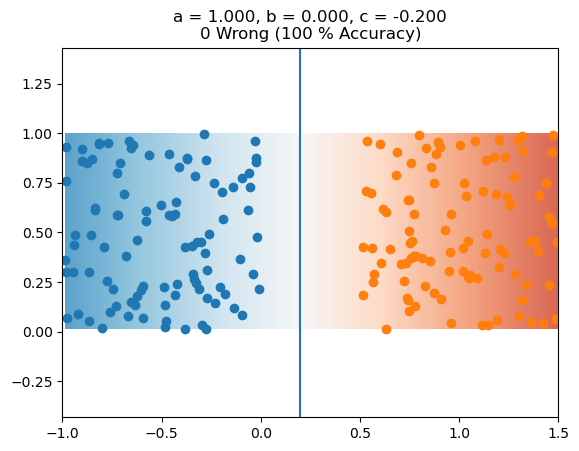

In [5]:
def plot_logistic_regression_predictions(X1, X2, a, b, c):
    plt.scatter(X1[:, 0], X1[:, 1])
    plt.scatter(X2[:, 0], X2[:, 1])
    X = np.concatenate((X1, X2), axis=0)
    xmin = np.min(X, axis=0)
    xmax = np.max(X, axis=0)
    iv = max(xmax[1]-xmin[1], xmax[0]-xmin[0])
    
    resol = 200
    mx = 2
    xx = np.linspace(xmin[0], xmax[0], resol)
    yy = np.linspace(xmin[1], xmax[1], resol)
    xx, yy = np.meshgrid(xx, yy)
    plt.imshow(logistic(a*xx+b*yy+c), extent=(xmin[0], xmax[0], xmax[1], xmin[1]), cmap='RdBu_r', vmin=0, vmax=1)
    
    
    p0 = -c*np.array([a, b])/(a**2 + b**2)
    v = np.array([-b, a])
    mag = np.sqrt(np.sum(v**2))
    if mag > 0:
        v = v/mag
        p = p0 - 2*iv*v
        q = p0 + 2*iv*v
        plt.plot([p[0], q[0]], [p[1], q[1]])
        rg = xmax[0] - xmin[0]
        plt.xlim([xmin[0]-0.2*rg, xmax[0]+0.2*rg])
        rg = xmax[1] - xmin[1]
        plt.ylim([xmin[1]-0.2*rg, xmax[1]+0.2*rg])

        wrong = 0
        for x in X1:
            y = logistic(a*x[0] + b*x[1] + c)
            proj = p0 + np.sum(v*(x-p0))*v
            #plt.plot([x[0], proj[0]], [x[1], proj[1]], c='C0')
            if y > 0.5:
                plt.scatter([x[0]], [x[1]], 200, c='C0', marker='x')
                wrong += 1
        for x in X2:
            y = logistic(a*x[0] + b*x[1] + c)
            proj = p0 + np.sum(v*(x-p0))*v
            #plt.plot([x[0], proj[0]], [x[1], proj[1]], c='C1')
            if y < 0.5:
                plt.scatter([x[0]], [x[1]], 200, c='C1', marker='x')
                wrong += 1
        N = X.shape[0]
        plt.title("a = {:.3f}, b = {:.3f}, c = {:.3f}\n{} Wrong ({} % Accuracy)".format(a, b, c, wrong, int(100*(N-wrong)/N)))
        plt.axis("equal")
        
X0 = np.random.rand(100, 2) - np.array([[1, 0]]) # 100 0 examples between x = [-1, 0], y = [0, 1]
X1 = np.random.rand(100, 2) + np.array([[0.5, 0]])


plot_logistic_regression_predictions(X0, X1, a=1, b=0, c=-0.2)
plt.xlim([-1,1.5])
plt.ylim([0, 1])

(-2.0, 2.0)

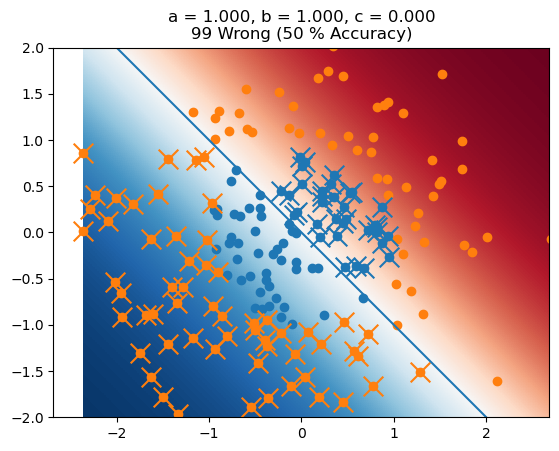

In [6]:
X = np.random.randn(200, 2)
r = np.sqrt(np.sum(X**2, axis=1))
X0 = X[r < 1, :] # Examples that have radius < 1
X1 = X[r >= 1, :] # Examples that have radius >= 1

plot_logistic_regression_predictions(X0, X1, a=1, b=1, c=0)
plt.xlim([-2, 2])
plt.ylim([-2, 2])

(0.0, 1.0)

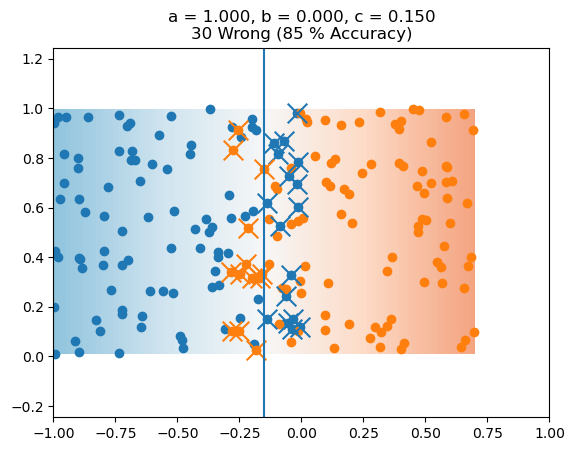

In [7]:
X0 = np.random.rand(100, 2) - np.array([[1, 0]]) # 100 0 examples between x = [-1, 0], y = [0, 1]
X1 = np.random.rand(100, 2) - np.array([[0.3, 0]])


plot_logistic_regression_predictions(X0, X1, a=1, b=0, c=0.15)
plt.xlim([-1, 1])
plt.ylim([0, 1])

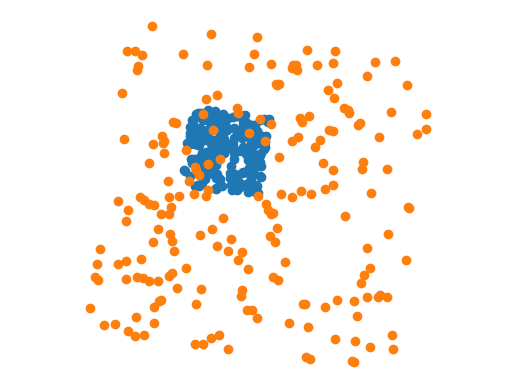

In [27]:
X0 = np.random.rand(200, 2)
X1 = 4*np.random.rand(200, 2) - 2 # + np.array([[6, 0]])

np.random.seed(1)
R = np.random.randn(2, 2)
U, S, V = np.linalg.svd(R)
R = U
X0 = X0.dot(R)
X1 = X1.dot(R)

plt.scatter(X0[:, 0], X0[:, 1])
plt.scatter(X1[:, 0], X1[:, 1])
plt.axis("equal")
plt.axis("off")
plt.savefig("ex.png")